# Setup and Installations

In [1]:
import os
import subprocess

# Define the setup script path
setup_script_path = 'setup_notebook.sh'

# Run the setup script
subprocess.call(['bash', setup_script_path])

# Print environment setup confirmation
print("Environment setup complete.")


no change     /opt/miniconda3/condabin/conda
no change     /opt/miniconda3/bin/conda
no change     /opt/miniconda3/bin/conda-env
no change     /opt/miniconda3/bin/activate
no change     /opt/miniconda3/bin/deactivate
no change     /opt/miniconda3/etc/profile.d/conda.sh
no change     /opt/miniconda3/etc/fish/conf.d/conda.fish
no change     /opt/miniconda3/shell/condabin/Conda.psm1
no change     /opt/miniconda3/shell/condabin/conda-hook.ps1
no change     /opt/miniconda3/lib/python3.12/site-packages/xontrib/conda.xsh
no change     /opt/miniconda3/etc/profile.d/conda.csh
no change     /Users/eviat/.zshrc
No action taken.
Channels:
 - defaults
Platform: osx-arm64
Solving environment: ...working... done

# All requested packages already installed.

Remove existing environment (y/[n])? 



CondaSystemExit: Exiting.



  Using cached stable_baselines3-2.3.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.7 kB)
  Using cached traci-1.20.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached sumo_rl-1.4.5-py3-none-any.whl.metadata (12 kB)
  Using cached tensorflow_macos-2.13.0-cp38-cp38-macosx_12_0_arm64.whl.metadata (3.2 kB)
  Using cached imageio-2.34.1-py3-none-any.whl.metadata (4.9 kB)
  Using cached numpy-1.24.4-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.6 kB)
  Using cached gym-0.26.2.tar.gz (721 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using 

ERROR: Cannot install matplotlib and matplotlib~=3.8.4 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts
Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'tensorflow'


In [1]:
import os
import sys

import gymnasium as gym
from stable_baselines3.dqn.dqn import DQN
print("SUMO_HOME:", os.environ.get("SUMO_HOME"))

SUMO_HOME: /opt/homebrew/opt/sumo/share/sumo


In [2]:
import os
import sumo_rl

# Get the path to the installed sumo-rl package
sumo_rl_path = os.path.dirname(sumo_rl.__file__)
print("Path to sumo-rl package:", sumo_rl_path)

# Optional: List the contents of the package directory
for root, dirs, files in os.walk(sumo_rl_path):
    for file in files:
        print(os.path.join(root, file))


Path to sumo-rl package: /opt/miniconda3/lib/python3.12/site-packages/sumo_rl
/opt/miniconda3/lib/python3.12/site-packages/sumo_rl/__init__.py
/opt/miniconda3/lib/python3.12/site-packages/sumo_rl/util/__init__.py
/opt/miniconda3/lib/python3.12/site-packages/sumo_rl/util/gen_route.py
/opt/miniconda3/lib/python3.12/site-packages/sumo_rl/util/__pycache__/gen_route.cpython-312.pyc
/opt/miniconda3/lib/python3.12/site-packages/sumo_rl/util/__pycache__/__init__.cpython-312.pyc
/opt/miniconda3/lib/python3.12/site-packages/sumo_rl/agents/ql_agent.py
/opt/miniconda3/lib/python3.12/site-packages/sumo_rl/agents/__init__.py
/opt/miniconda3/lib/python3.12/site-packages/sumo_rl/agents/__pycache__/ql_agent.cpython-312.pyc
/opt/miniconda3/lib/python3.12/site-packages/sumo_rl/agents/__pycache__/__init__.cpython-312.pyc
/opt/miniconda3/lib/python3.12/site-packages/sumo_rl/__pycache__/__init__.cpython-312.pyc
/opt/miniconda3/lib/python3.12/site-packages/sumo_rl/exploration/__init__.py
/opt/miniconda3/lib/

# Environment Setup

In [3]:
if "SUMO_HOME" in os.environ:
    tools = os.path.join(os.environ["SUMO_HOME"], "tools")
    sys.path.append(tools)
else:
    sys.exit("Please declare the environment variable 'SUMO_HOME'")

import traci
from sumo_rl import SumoEnvironment

# Training the DQN Agent

# Setup Timestamp for Training

In [4]:
from datetime import datetime
import pytz

jerusalem_tz = pytz.timezone('Asia/Jerusalem')

jerusalem_time = datetime.now(jerusalem_tz)

# Format the timestamp
timestamp = jerusalem_time.strftime("%Y%m%d_%H%M%S")

### SUMO Package Path and Configuration File


In [5]:
import sumo_rl
package_path = os.path.dirname(sumo_rl.__file__)
sumo_cfg_path = os.path.join(package_path, "nets/single-intersection/single-intersection.sumocfg")


### Environment preparation

In [19]:
env = SumoEnvironment(
        net_file=f"{package_path}/nets/single-intersection/single-intersection.net.xml",
        route_file=f"{package_path}/nets/single-intersection/single-intersection.rou.xml",
        out_csv_name = f"Outputs/single-intersection/dqn_{timestamp}.csv",
        single_agent=True,
        use_gui=False,
        num_seconds=3600,
    )

print("SUMO environment created")

 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 3ms, vehicles TOT 0 ACT 0 BUF 0)                      
SUMO environment created


### fixed policy environment preparation

In [39]:
env_fixed_policy = SumoEnvironment(
        net_file=f"{package_path}/nets/single-intersection/single-intersection.net.xml",
        route_file=f"{package_path}/nets/single-intersection/single-intersection.rou.xml",
        out_csv_name = f"Outputs/single-intersection/dqn_{timestamp}.csv",
        single_agent=True,
        use_gui=True,
        num_seconds=3600,
        min_green=42,
        max_green=42,
        yellow_time=2
    )

print("SUMO environment created")

 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 4ms, vehicles TOT 0 ACT 0 BUF 0)                      
SUMO environment created


### Agent preparation

In [11]:
model = DQN(
        env=env,
        policy="MlpPolicy",
        learning_rate=0.001,
        learning_starts=0,
        train_freq=1,
        target_update_interval=1,
        exploration_initial_eps=0.05,
        exploration_final_eps=0.01,
        verbose=2,
    )

sumo_binary = '/opt/homebrew/Cellar/sumo/1.20.0/bin/sumo-gui'

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


# Training the agent

### Run the following code to get the path to the SUMO remote server


In [8]:
# Use the package path in your command
if package_path:
    cmd = f"sumo-gui -c {sumo_cfg_path} --remote-port 65533"
    print("Run the following command in the terminal to start the SUMO server:")
    print(cmd)
else:
    print("sumo-rl package not found. Make sure it is installed.")

Run the following command in the terminal to start the SUMO server:
sumo-gui -c /opt/miniconda3/lib/python3.12/site-packages/sumo_rl/nets/single-intersection/single-intersection.sumocfg --remote-port 65533


In [15]:
import os
import matplotlib.pyplot as plt

from sumo_rl import SumoEnvironment
from stable_baselines3 import DQN
import traci
import imageio

if __name__ == "__main__":
    print("Connecting to SUMO server...")
    traci.connect(port=65533)
    print("Connected to SUMO server")
    
    num_of_episodes = 80
    print("Starting training")
    model.learn(total_timesteps=(720*num_of_episodes))
    print("Training completed")

    # Save the model
    model.save(f'savedAgent/single-intersection/dqnEpNum{num_of_episodes}')
    print("Model saved")

    # Close the TraCI connection
    traci.close()
    print("TraCI connection closed")


Connecting to SUMO server...
Connected to SUMO server
Starting training
 Retrying in 1 seconds
Step #3600.00 (0ms ?*RT. ?UPS, TraCI: 15ms, vehicles TOT 2559 ACT 39 BUF 0)               
 Retrying in 1 seconds
Step #3600.00 (0ms ?*RT. ?UPS, TraCI: 8ms, vehicles TOT 2497 ACT 17 BUF 0)                
 Retrying in 1 seconds
Step #3600.00 (0ms ?*RT. ?UPS, TraCI: 9ms, vehicles TOT 2494 ACT 21 BUF 0)                
 Retrying in 1 seconds
Step #3600.00 (0ms ?*RT. ?UPS, TraCI: 10ms, vehicles TOT 2500 ACT 31 BUF 0)               
 Retrying in 1 seconds
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 720      |
|    ep_rew_mean      | -0.415   |
|    exploration_rate | 0.03     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 67       |
|    time_elapsed     | 42       |
|    total_timesteps  | 2880     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.010

### Agent Prediction

Connecting to SUMO server...
Connected to SUMO server
 Retrying in 1 seconds
Step #18000.00 (0ms ?*RT. ?UPS, TraCI: 8ms, vehicles TOT 12367 ACT 43 BUF 205)            
 Retrying in 1 seconds
Step #18000.00 (0ms ?*RT. ?UPS, TraCI: 7ms, vehicles TOT 12293 ACT 43 BUF 152)            
 Retrying in 1 seconds
Step #18000.00 (0ms ?*RT. ?UPS, TraCI: 8ms, vehicles TOT 12395 ACT 42 BUF 34)             
 Retrying in 1 seconds
Step #18000.00 (0ms ?*RT. ?UPS, TraCI: 7ms, vehicles TOT 12481 ACT 40 BUF 269)            
 Retrying in 1 seconds


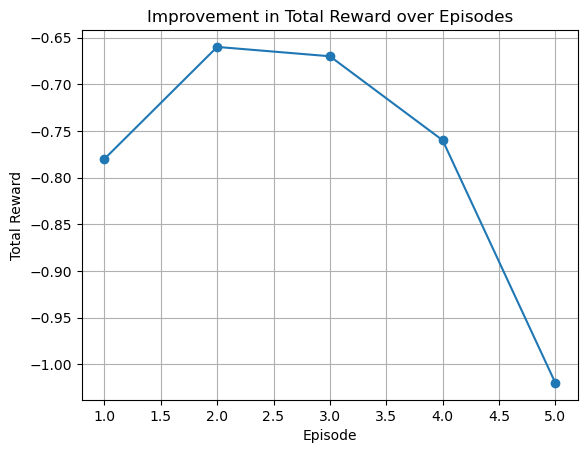

Step #18000.00 (0ms ?*RT. ?UPS, TraCI: 150ms, vehicles TOT 12332 ACT 40 BUF 237)          


In [20]:
def capture_screenshot(output_path, episode, step):
    file_name = f"episode_{episode}_step_{step}.png"
    file_path = os.path.join(output_path, file_name)
    traci.gui.screenshot(traci.gui.DEFAULT_VIEW, file_path)

def train_and_predict(env, model, episodes, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    rewards_per_episode = []  # List to store rewards for each episode

    for episode in range(episodes):
        obs, info = env.reset()
        done = False
        step = 0
        total_reward = 0  # Variable to store total reward for the episode
        while step < 3600:
            action, _states = model.predict(obs)
            results = env.step(action)
            if len(results) == 5:
                obs, rewards, done, _, info = results
                if done:
                    print(f"DONE: {done}")
            else:
                raise ValueError(f"Expected 5 values from env.step(), got {len(results)}")
            total_reward += rewards  # Accumulate rewards
            # Capture and save the environment state every 10 steps
            # if step % 10 == 0:
            #     capture_screenshot(save_path, episode, step)
            step += 1
        rewards_per_episode.append(total_reward)  # Append total reward for this episode

    # Plot the rewards
    plt.plot(range(1, episodes + 1), rewards_per_episode, marker='o')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Improvement in Total Reward over Episodes')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":

    print("Connecting to SUMO server...")
    traci.connect(port=65533)
    print("Connected to SUMO server")

    # Load the trained model
    loaded_model = DQN.load('savedAgent/single-intersection/dqnEpNum80')
    train_and_predict(env=env, model=loaded_model, episodes=5, save_path='Outputs/single-intersection/dqn_images')
    traci.close()

## Naive Fixed-Time Solution

In [14]:
def set_traffic_lights(step, duration_per_phase):
    cycle_time = step % sum(duration_per_phase.values())
    if cycle_time < duration_per_phase['green_a']:
        traci.trafficlight.setRedYellowGreenState('t', 'GGrr')  # Green for Lane A
    elif cycle_time < duration_per_phase['green_a'] + duration_per_phase['yellow_a']:
        traci.trafficlight.setRedYellowGreenState('t', 'yyrr')  # Yellow for Lane A
    elif cycle_time < duration_per_phase['green_a'] + duration_per_phase['yellow_a'] + duration_per_phase['green_b']:
        traci.trafficlight.setRedYellowGreenState('t', 'rrGG')  # Green for Lane B
    else:
        traci.trafficlight.setRedYellowGreenState('t', 'rryy')  # Yellow for Lane B

def fix_policy_step(step, duration_per_phase):
    set_traffic_lights(step, duration_per_phase)
    traci.simulationStep()

def naive_solution(env, episodes, duration_per_phase, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    rewards_per_episode = []  # List to store rewards for each episode

    for episode in range(episodes):
        obs, info = env.reset()
        done = False
        step = 0
        total_reward = 0  # Variable to store total reward for the episode
        while step < 3600:
            fix_policy_step(step, duration_per_phase)
            results = env.step(0)
            if len(results) == 5:
                obs, rewards, done, _, info = results
                if done:
                    print(f"DONE: {done}")
            else:
                raise ValueError(f"Expected 5 values from env.step(), got {len(results)}")
            total_reward += rewards  # Accumulate rewards
            step += 1
        rewards_per_episode.append(total_reward)  # Append total reward for this episode

    # Plot the rewards
    plt.plot(range(1, episodes + 1), rewards_per_episode, marker='o')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Improvement in Total Reward over Episodes')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":

    print("Connecting to SUMO server...")
    traci_connection_naive = traci.connect(port=65533)
    print("Connected to SUMO server")

    duration_per_phase = {
        'green_a': 42,
        'yellow_a': 2,
        'green_b': 42,
        'yellow_b': 2,
    }

    # Load the trained model
    naive_solution(env=env, episodes=1, duration_per_phase=duration_per_phase, save_path='Outputs/single-intersection/naive_episode')
    traci.close()
    traci_connection_naive = None

Connecting to SUMO server...
Connected to SUMO server
 Retrying in 1 seconds


KeyboardInterrupt: 

### Create a Video from the Captured Images

In [10]:
import imageio.v2 as imageio
from IPython.display import Video

def create_video(output_path, title):
    images = []
    for file_name in sorted(os.listdir(output_path)):
        if file_name.endswith(".png"):
            file_path = os.path.join(output_path, file_name)
            images.append(imageio.imread(file_path))
    video_path = f'{title}.mp4'
    imageio.mimsave(video_path, images, fps=10)
    return Video(video_path)

create_video("outputs/single-intersection/dqn_images", "DQN Agent Solution")


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1430, 613) to (1440, 624) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


# Visualizing and Analyzing the Results

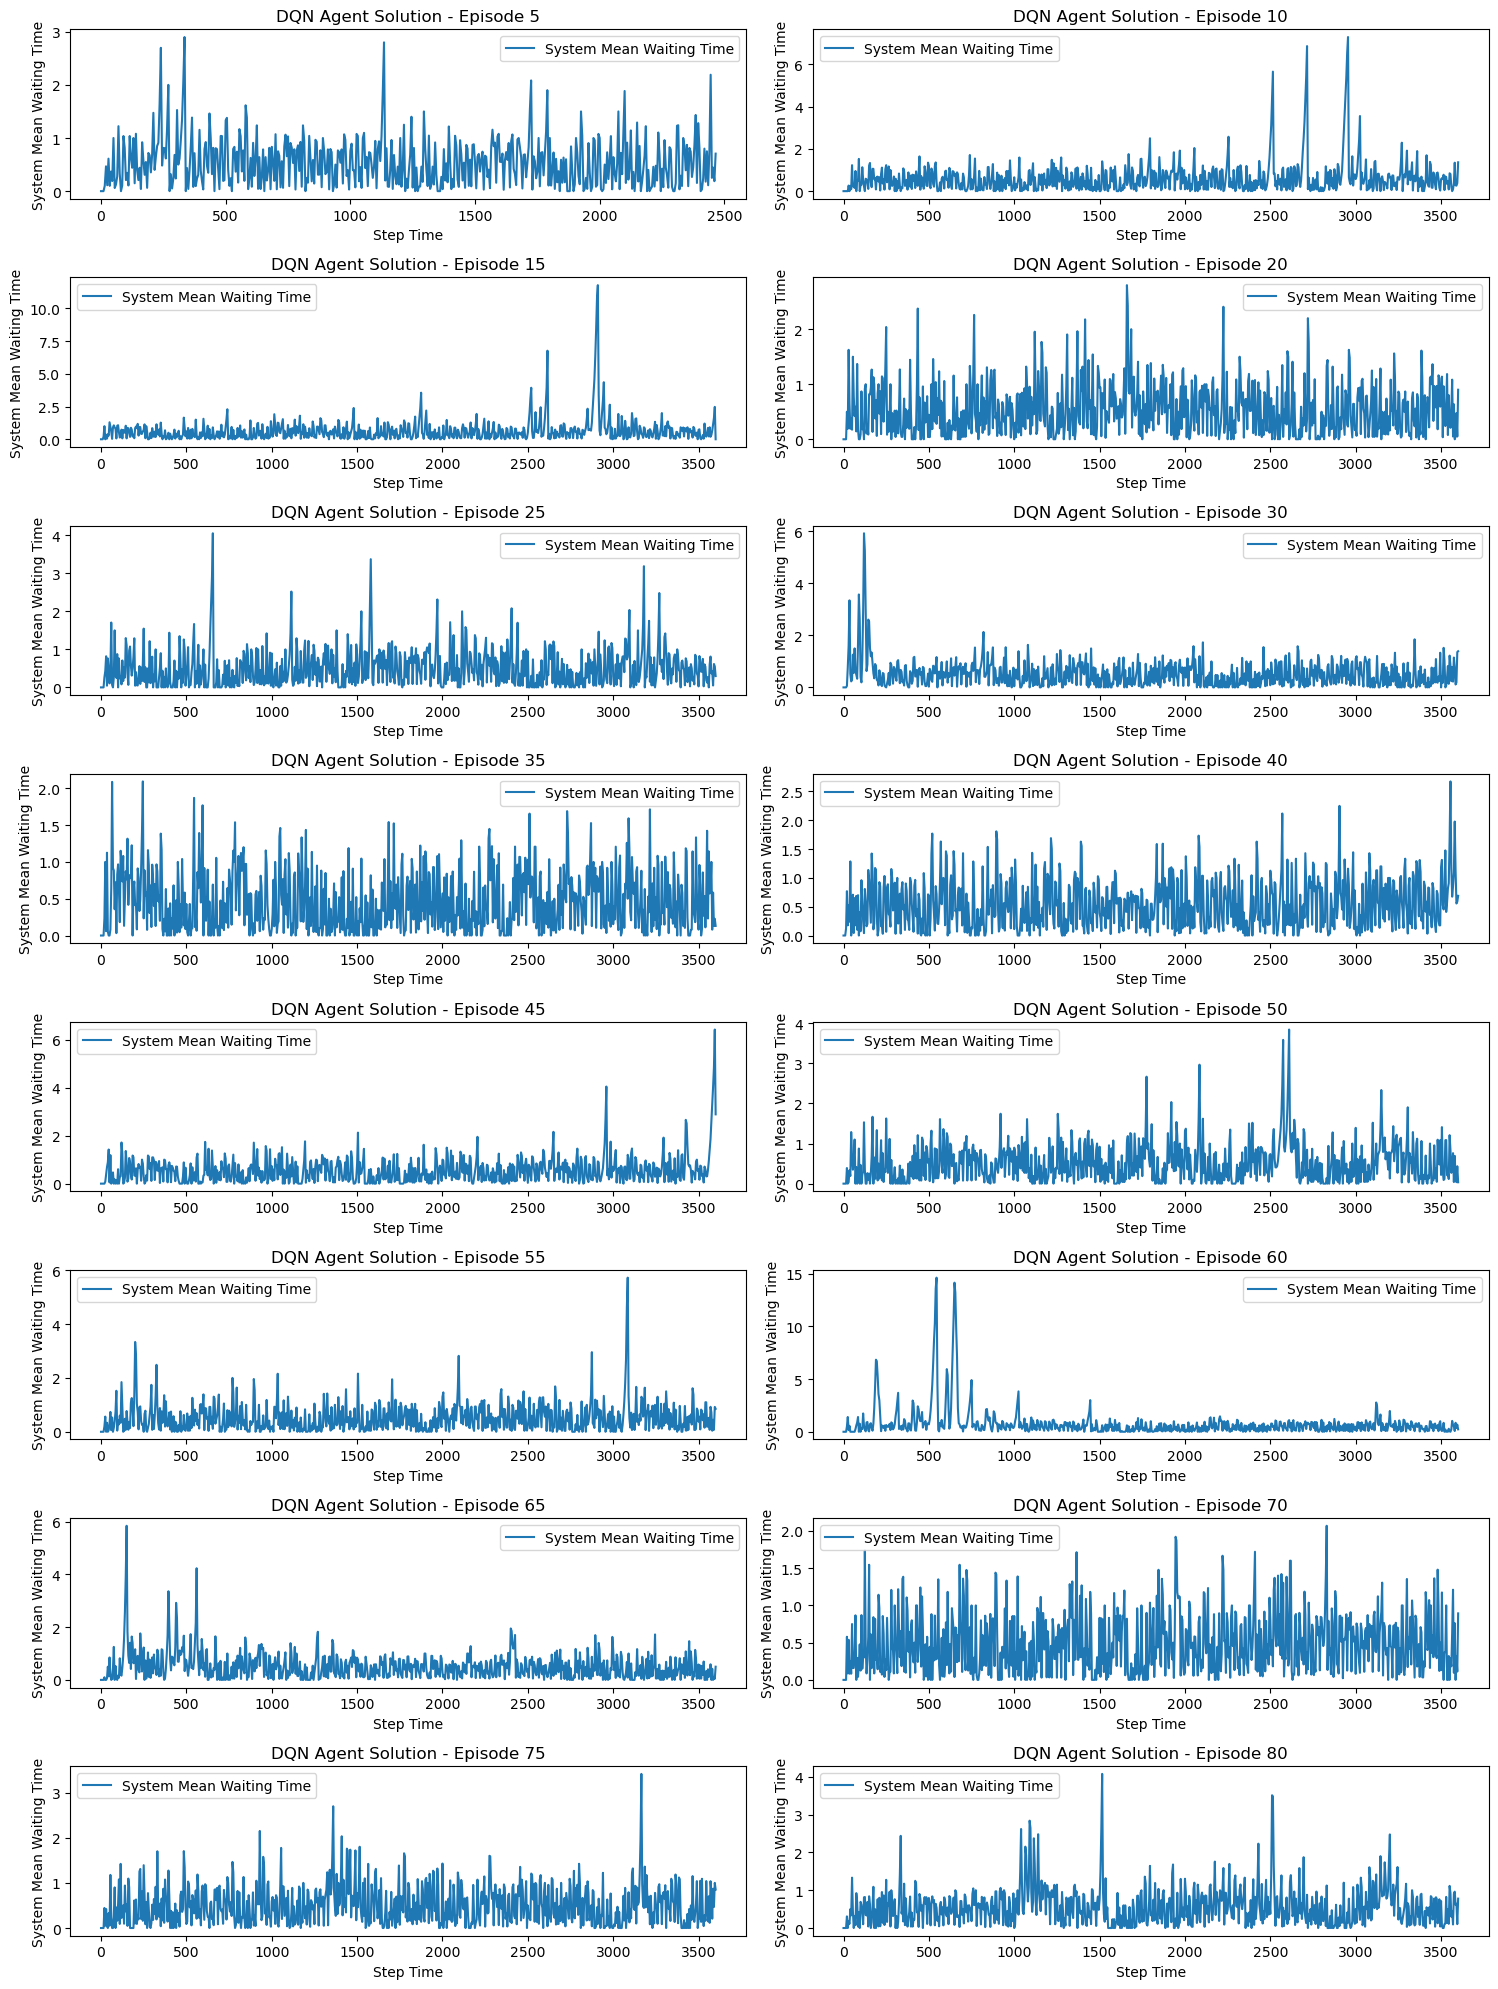

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_metrics(data, title, ax):
    ax.plot(data['step'], data['system_mean_waiting_time'], label='System Mean Waiting Time')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('System Mean Waiting Time')
    ax.set_title(title)
    ax.legend()

def visualize_results():
    episodes = range(5, 85, 5)
    fig, axs = plt.subplots(len(episodes)//2, 2, figsize=(15, 20))
    axs = axs.flatten()

    for i, episode in enumerate(episodes):
        file_path = f"Outputs/single-intersection/dqn_20240612_164825.csv_conn1_ep{episode}.csv"
        title = f"DQN Agent Solution - Episode {episode}"
        
        try:
            data = pd.read_csv(file_path)
            if 'step' not in data.columns or 'system_mean_waiting_time' not in data.columns:
                raise KeyError("CSV file does not contain required columns: 'step' and 'system_mean_waiting_time'")
            
            plot_metrics(data, title, axs[i])
        
        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except KeyError as e:
            print(e)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    visualize_results()
    



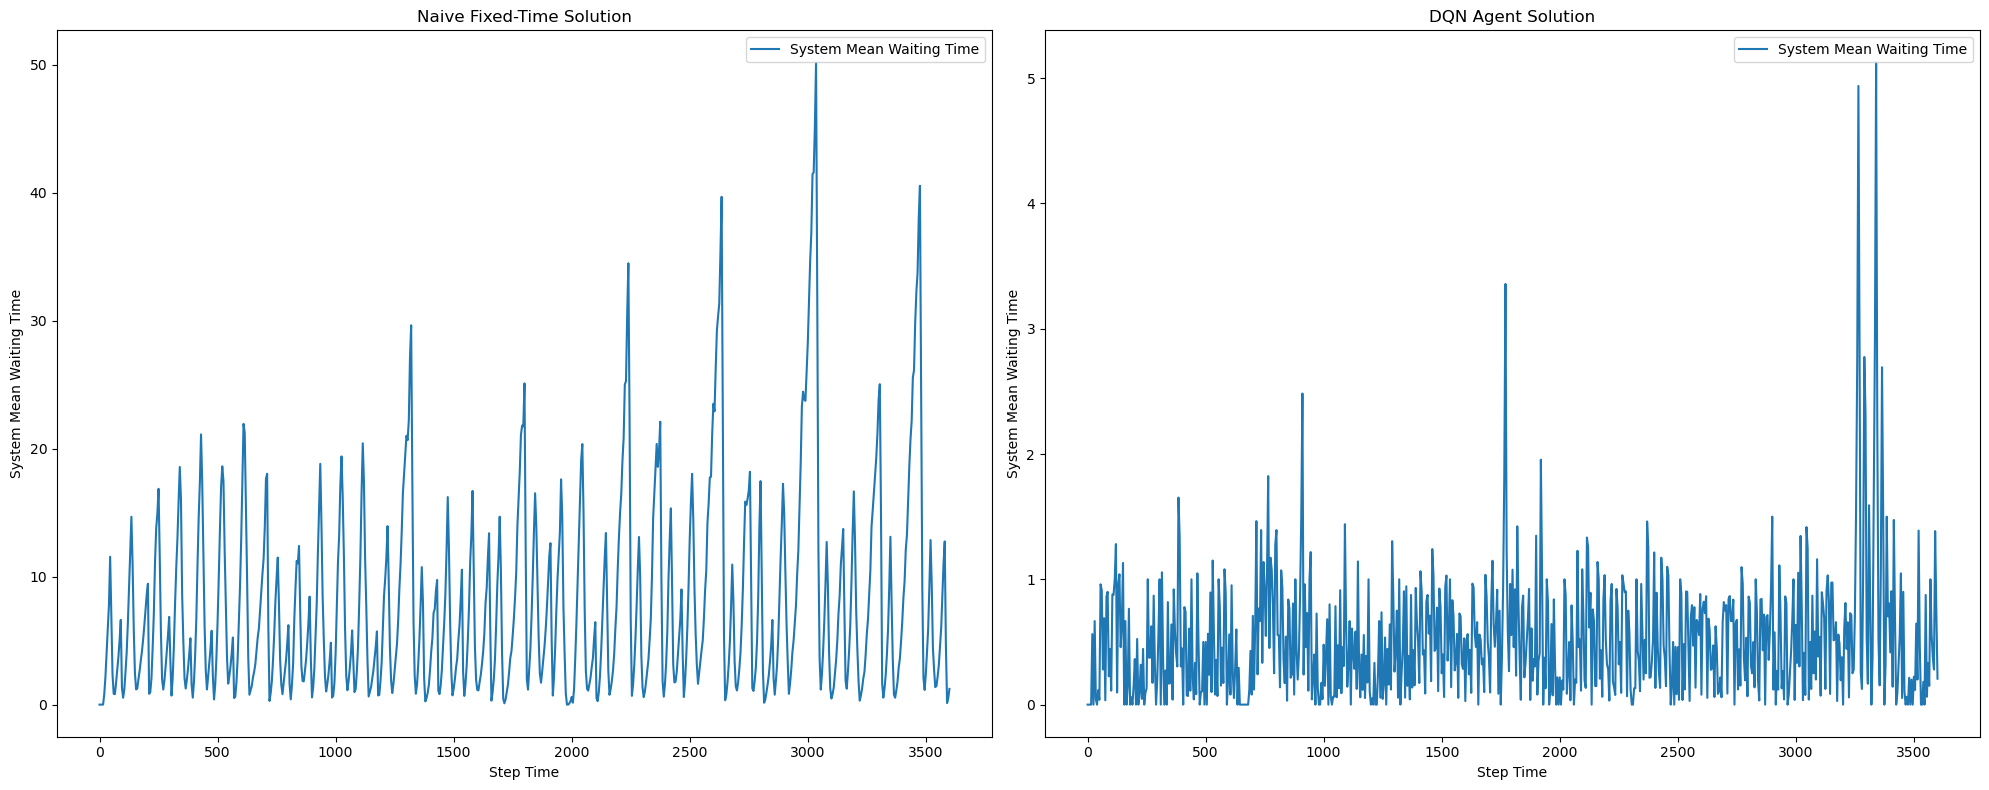

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics(ax, file_path, title):
    data = pd.read_csv(file_path)
    if 'step' not in data.columns or 'system_mean_waiting_time' not in data.columns:
        raise KeyError("CSV file does not contain required columns: 'step' and 'system_mean_waiting_time'")
    ax.plot(data['step'], data['system_mean_waiting_time'], label='System Mean Waiting Time')
    ax.set_xlabel('Step Time')
    ax.set_ylabel('System Mean Waiting Time')
    ax.set_title(title)
    ax.legend()

def visualize_results():
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    
    # Naive solution
    plot_metrics(axs[0], "Outputs/single-intersection/naive_episode/dqn_20240610_220041.csv_conn3_ep3.csv", "Naive Fixed-Time Solution")
    # DQN agent solution
    plot_metrics(axs[1], "Outputs/single-intersection/dqn_20240612_164825.csv_conn1_ep85.csv", "DQN Agent Solution")
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    visualize_results()



## Calculate the Overall Average Waiting Time

The overall average waiting time is: 0.6000850303618284


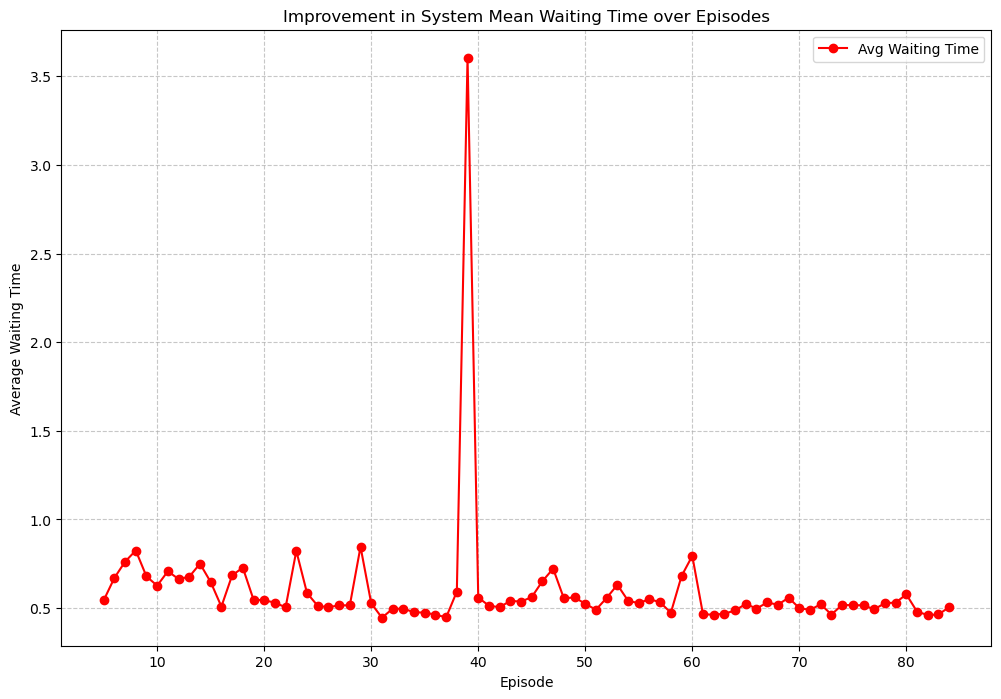

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

mean_average_waiting_time = 0
list_of_average = []
episodes = list(range(5, 85))  # Define the correct range of episodes

# Load the new CSV file
for episode in episodes:
    file_path = f'Outputs/single-intersection/dqn_20240612_164825.csv_conn1_ep{episode}.csv'
    data = pd.read_csv(file_path)
    # Calculate the overall average waiting time
    average_waiting_time = data['system_mean_waiting_time'].mean()
    mean_average_waiting_time += average_waiting_time  
    list_of_average.append(average_waiting_time)

# Calculate the overall mean average waiting time
overall_mean_average_waiting_time = mean_average_waiting_time / len(episodes)
print(f'The overall average waiting time is: {overall_mean_average_waiting_time}\n')

# Plotting the average waiting time over episodes
plt.figure(figsize=(12, 8))
plt.plot(episodes, list_of_average, marker='o', linestyle='-', color='r', label='Avg Waiting Time')
plt.xlabel('Episode')
plt.ylabel('Average Waiting Time')
plt.title('Improvement in System Mean Waiting Time over Episodes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Run the trained DQN agent and visualize the results


In [ ]:
if __name__ == "__main__":
    print("Connecting to SUMO server...")
    traci_connection = traci.connect(port=65533)
    print("Connected to SUMO server")

    env = SumoEnvironment(
        net_file="/Users/md/Desktop/sumo-rl/nets/single-intersection/single-intersection.net.xml",
        route_file="/Users/md/Desktop/sumo-rl/nets/single-intersection/single-intersection.rou.xml",
        out_csv_name="outputs/2way-single-intersection/dqn",
        single_agent=True,
        use_gui=True,
        num_seconds=3600,
        max_depart_delay=0)
    
    model = DQN.load("path_to_trained_model.zip")

    obs = env.reset()
    for _ in range(env.simulation_steps):
        action, _ = model.predict(obs)
        obs, rewards, dones, info = env.step(action)

    visualize_results()

# Creating and Exporting Videos

In [14]:
def create_video(output_path, title):
    import imageio
    from IPython.display import Video

    images = []
    for file_name in sorted(os.listdir(output_path)):
        if file_name.endswith(".png"):
            file_path = os.path.join(output_path, file_name)
            images.append(imageio.imread(file_path))
    imageio.mimsave(f'{title}.mp4', images, fps=10)
    return Video(f'{title}.mp4')

if __name__ == "__main__":
    create_video("outputs/2way-single-intersection/naive_episode", "Naive Solution")
    create_video("outputs/2way-single-intersection/dqn_images", "DQN Agent Solution")


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/2way-single-intersection/naive_images'